In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

dataframe = pd.read_csv('/content/doacao.csv', header=0,
                 na_values='?', comment='\t',
                 skipinitialspace=True)

df = dataframe.copy()
print(df)

     Recência  Frequência  Quantidade  Tempo  Doou
0           2          50       12500     98     1
1           0          13        3250     28     1
2           1          16        4000     35     1
3           2          20        5000     45     1
4           1          24        6000     77     0
..        ...         ...         ...    ...   ...
743        23           2         500     38     0
744        21           2         500     52     0
745        23           3         750     62     0
746        39           1         250     39     0
747        72           1         250     72     0

[748 rows x 5 columns]


In [ ]:
df_sim = df[df['Doou']==1]
df_nao = df[df['Doou']==0]

print(len(df_sim))
print(len(df_nao))

178
570


In [ ]:
df_nao_red = resample(df_nao,
                      replace = False,
                      n_samples = len(df_sim),
                      random_state = 42)
print(len(df_nao_red))

178


In [ ]:
df_novo = pd.concat([df_sim, df_nao_red])
print(len(df_novo))

356


In [ ]:
X = df_novo.drop('Doou', axis = 1).copy()
y = df_novo['Doou'].copy()

In [ ]:
# Centraliza e padroniza os dados
# Cada Coluna deve ter media = 0 e desvio padrao = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.10)
X_train_pad = scale(X_train)
X_test_pad = scale(X_test)
print(len(X_train), len(X_test))

320 36


In [ ]:
# Inicia a construcao
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_pad, y_train)

SVC(random_state=42)

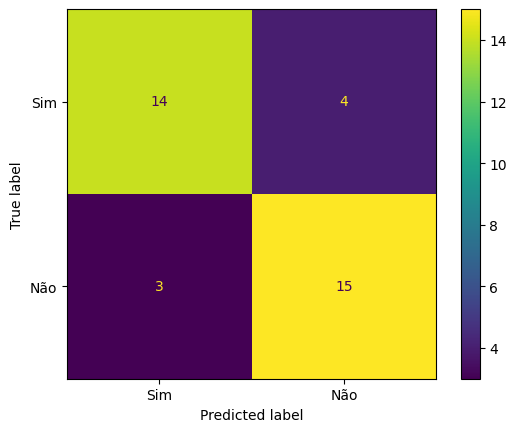

In [ ]:
# Matriz de Confusao
cm = confusion_matrix(y_test, clf_svm.predict(X_test_pad))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sim', 'Não'])
disp.plot(values_format='d')

In [ ]:
novos_dados = pd.DataFrame([
    [2, 2, 500, 4],
    [18, 2, 500, 23],
    [21, 3, 750, 35],
    [21, 3, 750, 64]
], columns=["Recência", "Frequência", "Quantidade", "Tempo"])

# Padronizar com o mesmo scale do treino
novos_dados_pad = scale(novos_dados)

# Prever com o modelo já treinado
previsoes = clf_svm.predict(novos_dados_pad)

# Mostrar resultados
for i, p in enumerate(previsoes, start=1):
    print(f"Doador {i}: {'Doou' if p == 1 else 'Não doou'}")

Doador 1: Doou
Doador 2: Não doou
Doador 3: Não doou
Doador 4: Não doou
